<a href="https://colab.research.google.com/github/fidelatrstyni/PCVK_Genap_2021/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Object Detection**

1.   Template Matching
2.   Edge Detection
3.   Corner Detection
4.   Grid Detection
4.   Contour Detection





In [1]:
#import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Akses drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Template Matching**
Menggunakan library openCV:

**cv.matchTemplate()**, dengan parameter


*   **Image**: Citra input
*   **Templ**: template dicari, ukurannya tidak boleh lebih besar dari citra input.
*   **method**: metode dari template matching

Jenis metode template matching di OpenCV:
1.   TM_SQDIFF
2.   TM_SQDIFF_NORMED
3.   TM_CCORR
4.   TM_CCORR_NORMED
5.   TM_CCOEFF
6.   TM_CCOEFF_NORMED



In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



In [30]:
template = cv2.imread("/content/drive/MyDrive/PCVK/Object Detection/cat2_templatejpg.jpg")
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
img = cv2.imread("/content/drive/MyDrive/PCVK/Object Detection/cats_and_bunnies.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

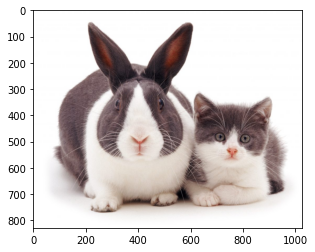

In [31]:

plt.imshow(img)

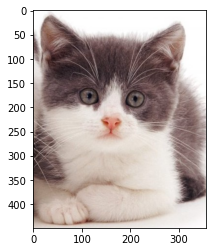

In [32]:
plt.imshow(template)

In [20]:
template.shape

(449, 356, 3)

In [24]:
methods =["cv2.TM_CCOEFF" , "cv2.TM_CCOEFF_NORMED", "cv2.TM_CCORR" , "cv2.TM_CCORR_NORMED" , "cv2.TM_SQDIFF" , "cv2.TM_SQDIFF_NORMED"]

(597, 305)


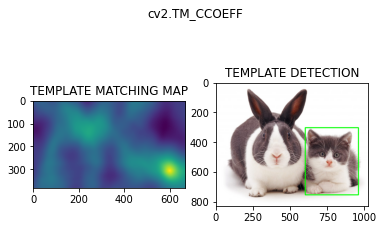





(597, 305)


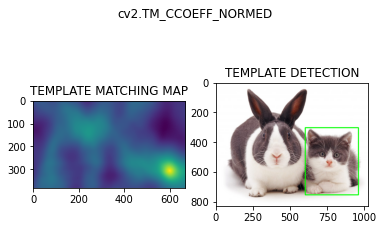





(668, 0)


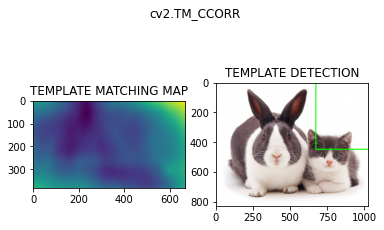





(597, 305)


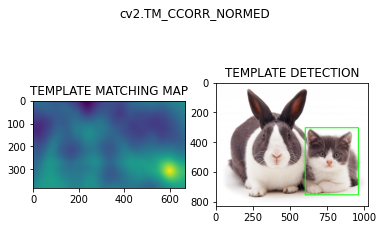





(597, 305)


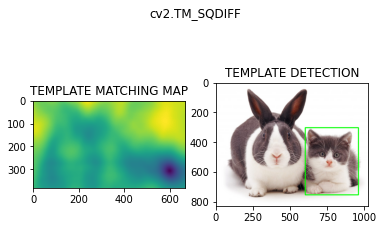





(597, 305)


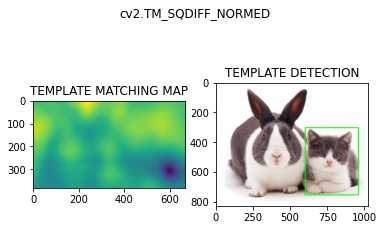

In [26]:
for m in methods:
  img_copy = img.copy()
  method = eval(m)
  res = cv2.matchTemplate(img_copy,template,method)
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

  if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
  else:
    top_left = max_loc
  print(top_left)    

  height, width, channels = template.shape  
  bottom_right = (top_left[0]+width, top_left[1]+height)

  cv2.rectangle(img_copy, top_left, bottom_right, (0,255,0),6)

  plt.subplot(121)
  plt.imshow(res)
  plt.title("TEMPLATE MATCHING MAP")
  plt.subplot(122)
  plt.imshow(img_copy)
  plt.title("TEMPLATE DETECTION")
  plt.suptitle(m)

  plt.show()
  print("\n")
  print("\n")